In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


cars = pd.read_csv('./dataset/CarPrice_Assignment.csv')

In [39]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [40]:
cars.shape

(205, 26)

In [41]:
numeric_cols = cars.select_dtypes(include=['float64', 'int64']).columns
cars_numeric = cars[numeric_cols]


cars_numeric = cars_numeric.drop(['car_ID', 'symboling'], axis=1)

cars_numeric.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [42]:
# Padronização dos dados
scaler = StandardScaler()
cars_numeric_scaled = scaler.fit_transform(cars_numeric)

In [43]:
# Calculando a matriz de covariância
# cov_matrix = np.cov(cars_numeric_scaled, rowvar=False)

# Aplicando a SVD
U, S, V = np.linalg.svd(cars_numeric_scaled)

# Calculando a variância explicada
explained_variance_ratio = S**2 / np.sum(S**2)

print(U.shape)
print(S.shape)
print(V.shape)

(205, 205)
(14,)
(14, 14)


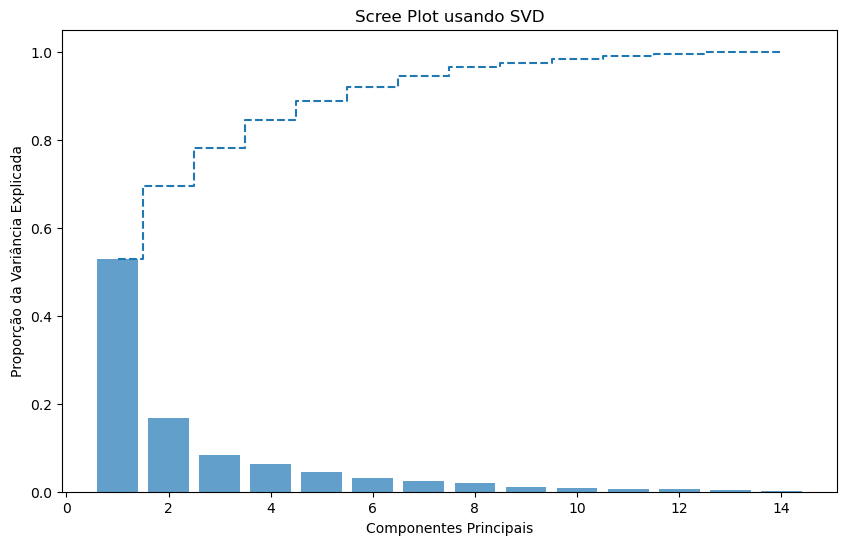

In [44]:
# Scree Plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center')
plt.step(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), where='mid', linestyle='--')
plt.title('Scree Plot usando SVD')
plt.xlabel('Componentes Principais')
plt.ylabel('Proporção da Variância Explicada')
plt.show()

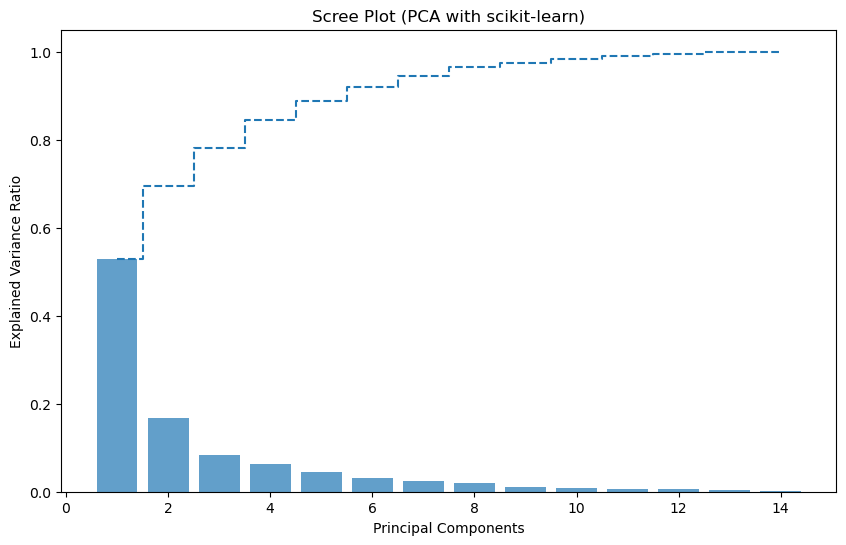

In [45]:
# Apply PCA
pca = PCA()  # You can adjust this based on your needs
df_pca_sklearn = pca.fit_transform(cars_numeric_scaled)

# Scree Plot using scikit-learn's explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, alpha=0.7, align='center')
plt.step(range(1, pca.n_components_ + 1), np.cumsum(pca.explained_variance_ratio_), where='mid', linestyle='--')
plt.title('Scree Plot (PCA with scikit-learn)')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

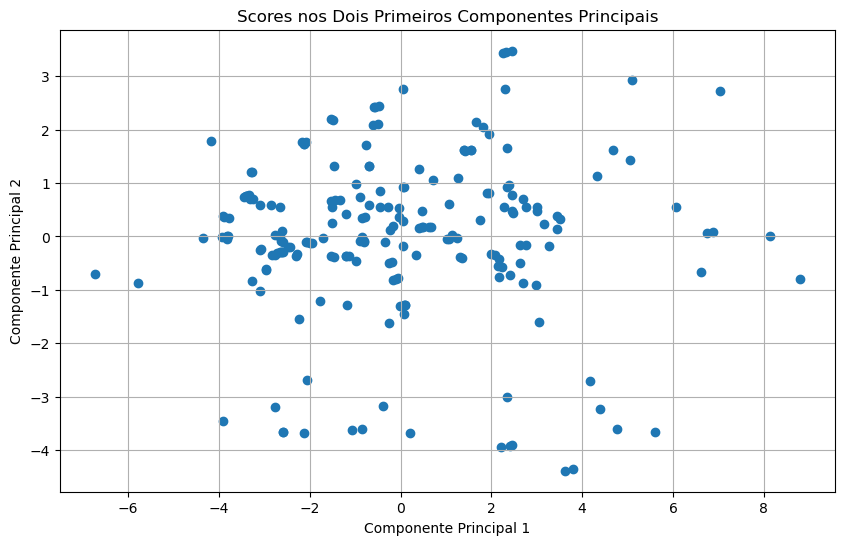

In [46]:
# Projeta os dados nos componentes principais
scores = np.dot(cars_numeric_scaled, V.T)

# Cria um gráfico de dispersão para os dois primeiros componentes principais
plt.figure(figsize=(10, 6))
plt.scatter(scores[:, 0], scores[:, 1])
plt.title('Scores nos Dois Primeiros Componentes Principais')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()


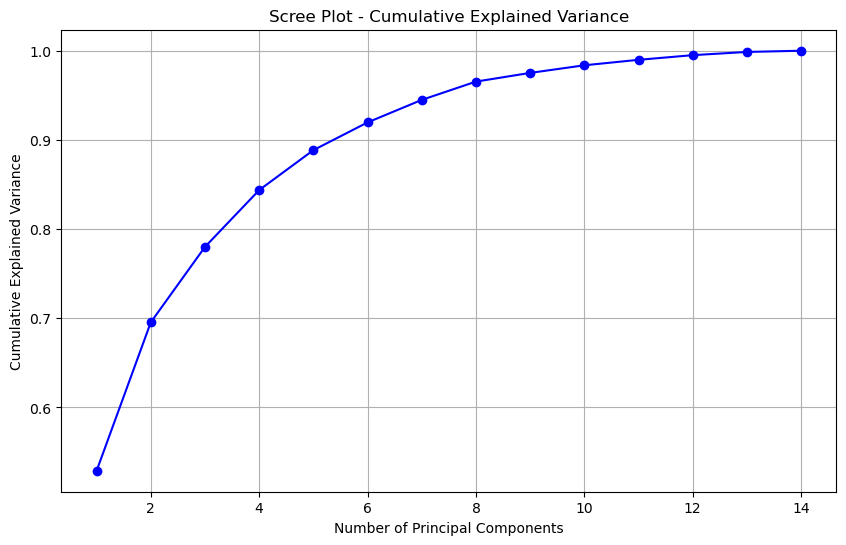

PC1 Explained Variance: 0.5291
PC2 Explained Variance: 0.1665
PC3 Explained Variance: 0.0846
PC4 Explained Variance: 0.0637
PC5 Explained Variance: 0.0448
PC6 Explained Variance: 0.0311
PC7 Explained Variance: 0.0253
PC8 Explained Variance: 0.0205
PC9 Explained Variance: 0.0098
PC10 Explained Variance: 0.0085
PC11 Explained Variance: 0.0061
PC12 Explained Variance: 0.0052
PC13 Explained Variance: 0.0036
PC14 Explained Variance: 0.0014


In [47]:
# Calcula a variancia acumuluada explicativa
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Cria um gráfico de Scree
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-', color='b')
plt.title('Scree Plot - Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Printa as variâncias explicadas para cada componente principal
for i, explained_var in enumerate(explained_variance_ratio, start=1):
    print(f'PC{i} Explained Variance: {explained_var:.4f}')


Shape of the reduced data: (205, 6)


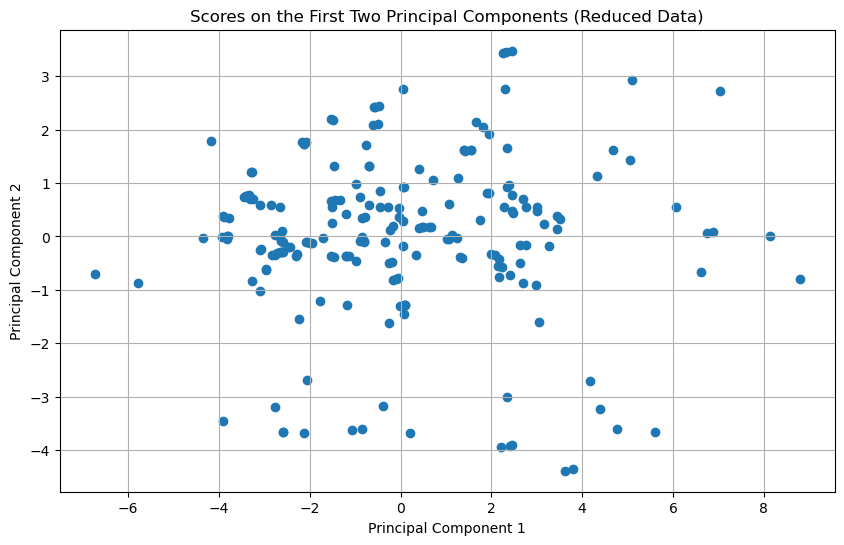

In [48]:
# Keep only the first 4 principal components
num_components = 6
selected_components = V[:num_components, :]

# Transform the standardized data using the selected components
data_reduced = np.dot(cars_numeric_scaled, selected_components.T)

# Print the shape of the reduced data
print(f"Shape of the reduced data: {data_reduced.shape}")

# Visualize the scores on the first two principal components for the reduced data
plt.figure(figsize=(10, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1])
plt.title('Scores on the First Two Principal Components (Reduced Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11112\23836988.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(price_labels))


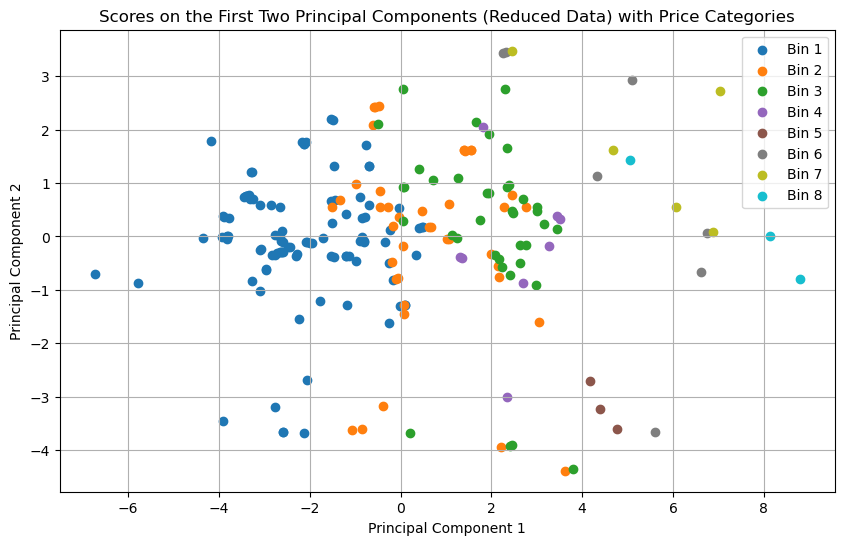

In [49]:
# Define price categories (bins)
price_bins = [5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 50000]  # You can adjust the bin edges
price_labels = ['Bin 1', 'Bin 2', 'Bin 3', 'Bin 4', 'Bin 5', 'Bin 6', 'Bin 7', 'Bin 8']

# Create a new column 'price_category' based on price bins
cars['price_category'] = pd.cut(cars['price'], bins=price_bins, labels=price_labels, right=False)

# Keep only the necessary columns for the scores plot
scores_df = pd.DataFrame(data_reduced[:, :2], columns=['PC1', 'PC2'])
scores_df['price_category'] = cars['price_category']

# Create a colormap for price categories
colors = plt.cm.get_cmap('tab10', len(price_labels))

# Plot the scores with colors based on price categories
plt.figure(figsize=(10, 6))
for i, label in enumerate(price_labels):
    subset = scores_df[scores_df['price_category'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'{label}', color=colors(i))

plt.title('Scores on the First Two Principal Components (Reduced Data) with Price Categories')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()
